<a href="https://colab.research.google.com/github/Nivy31/Power-BI/blob/main/laptop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/laptop.csv")

In [4]:
df.to_csv("/content/drive/MyDrive/laptop_cleaned.csv", index=False)

In [5]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
print(df.isnull().all(axis=1).sum())
df = df.dropna(how='all')
df.isna().sum()


26


,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [6]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.describe()

,Price
count,1273.000000
mean,59955.814073
std,37332.251005
min,9270.720000
25%,31914.720000
50%,52161.120000
75%,79333.387200
max,324954.720000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1298
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


In [9]:
df[['Screen_Width', 'Screen_Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(float)
df['TotalPixels'] = df['Screen_Width'] * df['Screen_Height']
df['Display_Features'] = df['ScreenResolution'].str.replace(r'\d+x\d+', '', regex=True).str.strip()
df = df.drop(columns=['ScreenResolution'])


In [10]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0,4096000.0,IPS Panel Retina Display
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0,1296000.0,
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0,2073600.0,Full HD
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0,5184000.0,IPS Panel Retina Display
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0,4096000.0,IPS Panel Retina Display


In [11]:
df['CPU_Brand'] = df['Cpu'].str.extract(r'(Intel|AMD)')
df['CPU_Type'] = df['Cpu'].str.extract(r'(i\d|A\d)')
df['CPU_Freq_GHz'] = df['Cpu'].str.extract(r'(\d+\.?\d*)GHz').astype(float)
df['Cpu_Original'] = df['Cpu']
df = df.drop(columns=['Cpu'])

In [12]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz
3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz
4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz


In [13]:
df['RAM_GB'] = df['Ram'].str.replace('GB','', regex=False).str.strip().astype(int)
df = df.drop(columns=['Ram'])


In [14]:
df.head()

,Company,TypeName,Inches,Memory,Gpu,OpSys,Weight,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original,RAM_GB
0,Apple,Ultrabook,13.3,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz,8
1,Apple,Ultrabook,13.3,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz,8
2,HP,Notebook,15.6,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz,8
3,Apple,Ultrabook,15.4,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz,16
4,Apple,Ultrabook,13.3,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz,8


In [15]:
df['Memory'] = df['Memory'].str.replace(
    r'(\d+)\s*TB',
    lambda m: f"{int(m.group(1)) * 1024}GB",
    regex=True
)


In [16]:
df['Memory_Total_GB'] = df['Memory'].str.extractall(r'(\d+)GB')[0].astype(int).groupby(level=0).sum()

In [17]:
df.head()

,Company,TypeName,Inches,Memory,Gpu,OpSys,Weight,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original,RAM_GB,Memory_Total_GB
0,Apple,Ultrabook,13.3,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz,8,128.0
1,Apple,Ultrabook,13.3,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz,8,128.0
2,HP,Notebook,15.6,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz,8,256.0
3,Apple,Ultrabook,15.4,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz,16,512.0
4,Apple,Ultrabook,13.3,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz,8,256.0


In [18]:
df = df.drop(columns=['Memory'])

In [19]:
df.head()

,Company,TypeName,Inches,Gpu,OpSys,Weight,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original,RAM_GB,Memory_Total_GB
0,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz,8,128.0
1,Apple,Ultrabook,13.3,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz,8,128.0
2,HP,Notebook,15.6,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz,8,256.0
3,Apple,Ultrabook,15.4,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz,16,512.0
4,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz,8,256.0


In [20]:
df['GPU_Brand'] = df['Gpu'].str.split().str[0]

In [21]:
df.head()

,Company,TypeName,Inches,Gpu,OpSys,Weight,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original,RAM_GB,Memory_Total_GB,GPU_Brand
0,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz,8,128.0,Intel
1,Apple,Ultrabook,13.3,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz,8,128.0,Intel
2,HP,Notebook,15.6,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz,8,256.0,Intel
3,Apple,Ultrabook,15.4,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz,16,512.0,AMD
4,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz,8,256.0,Intel


In [22]:
df['GPU_Model'] = df['Gpu'].str.replace(df['GPU_Brand'] + ' ', '', regex=False)


In [23]:
df.head()

,Company,TypeName,Inches,Gpu,OpSys,Weight,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model
0,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz,8,128.0,Intel,NaN
1,Apple,Ultrabook,13.3,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz,8,128.0,Intel,NaN
2,HP,Notebook,15.6,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz,8,256.0,Intel,NaN
3,Apple,Ultrabook,15.4,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz,16,512.0,AMD,NaN
4,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz,8,256.0,Intel,NaN


In [24]:
df['GPU_Model'] = df.apply(lambda row: row['Gpu'].replace(row['GPU_Brand'] + ' ', ''), axis=1)


In [25]:
df.head()

,Company,TypeName,Inches,Gpu,OpSys,Weight,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model
0,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz,8,128.0,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz,8,128.0,Intel,HD Graphics 6000
2,HP,Notebook,15.6,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz,8,256.0,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz,16,512.0,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz,8,256.0,Intel,Iris Plus Graphics 650


In [26]:
# Remove numbers from GPU_Model
df['GPU_Model'] = df['GPU_Model'].str.replace(r'\d+', '', regex=True)

# strip extra spaces
df['GPU_Model'] = df['GPU_Model'].str.strip()


In [27]:
df = df.drop(columns=['Gpu'])


In [28]:
df.head()

,Company,TypeName,Inches,OpSys,Weight,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model
0,Apple,Ultrabook,13.3,macOS,1.37kg,71378.6832,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz,8,128.0,Intel,Iris Plus Graphics
1,Apple,Ultrabook,13.3,macOS,1.34kg,47895.5232,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz,8,128.0,Intel,HD Graphics
2,HP,Notebook,15.6,No OS,1.86kg,30636.0000,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz,8,256.0,Intel,HD Graphics
3,Apple,Ultrabook,15.4,macOS,1.83kg,135195.3360,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz,16,512.0,AMD,Radeon Pro
4,Apple,Ultrabook,13.3,macOS,1.37kg,96095.8080,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz,8,256.0,Intel,Iris Plus Graphics


In [29]:
import numpy as np  # needed for np.nan

# Replace '?' with NaN
df['Weight'] = df['Weight'].replace('?', np.nan)

# Remove 'kg' and convert to float
df['Weight_kg'] = df['Weight'].str.replace('kg', '', regex=False).astype(float)

In [30]:
df.head()

,Company,TypeName,Inches,OpSys,Weight,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model,Weight_kg
0,Apple,Ultrabook,13.3,macOS,1.37kg,71378.6832,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz,8,128.0,Intel,Iris Plus Graphics,1.37
1,Apple,Ultrabook,13.3,macOS,1.34kg,47895.5232,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz,8,128.0,Intel,HD Graphics,1.34
2,HP,Notebook,15.6,No OS,1.86kg,30636.0000,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz,8,256.0,Intel,HD Graphics,1.86
3,Apple,Ultrabook,15.4,macOS,1.83kg,135195.3360,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz,16,512.0,AMD,Radeon Pro,1.83
4,Apple,Ultrabook,13.3,macOS,1.37kg,96095.8080,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz,8,256.0,Intel,Iris Plus Graphics,1.37


In [31]:
df=df.drop(columns=['Weight'])

In [32]:
df.head()

,Company,TypeName,Inches,OpSys,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model,Weight_kg
0,Apple,Ultrabook,13.3,macOS,71378.6832,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz,8,128.0,Intel,Iris Plus Graphics,1.37
1,Apple,Ultrabook,13.3,macOS,47895.5232,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz,8,128.0,Intel,HD Graphics,1.34
2,HP,Notebook,15.6,No OS,30636.0000,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz,8,256.0,Intel,HD Graphics,1.86
3,Apple,Ultrabook,15.4,macOS,135195.3360,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz,16,512.0,AMD,Radeon Pro,1.83
4,Apple,Ultrabook,13.3,macOS,96095.8080,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz,8,256.0,Intel,Iris Plus Graphics,1.37


In [33]:
df_backup = df.copy()


In [34]:
df['Price'] = df['Price'].round(2)


In [35]:
df.head()

,Company,TypeName,Inches,OpSys,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model,Weight_kg
0,Apple,Ultrabook,13.3,macOS,71378.68,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz,8,128.0,Intel,Iris Plus Graphics,1.37
1,Apple,Ultrabook,13.3,macOS,47895.52,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz,8,128.0,Intel,HD Graphics,1.34
2,HP,Notebook,15.6,No OS,30636.00,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz,8,256.0,Intel,HD Graphics,1.86
3,Apple,Ultrabook,15.4,macOS,135195.34,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz,16,512.0,AMD,Radeon Pro,1.83
4,Apple,Ultrabook,13.3,macOS,96095.81,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz,8,256.0,Intel,Iris Plus Graphics,1.37


In [36]:
# Save to a CSV file in your Drive
df.to_csv("/content/drive/MyDrive/laptop_cleaned_full.csv", index=False)


In [37]:
df_backup.to_csv("/content/drive/MyDrive/laptop_cleaned_backup.csv", index=False)


In [38]:
df.head()

,Company,TypeName,Inches,OpSys,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,Cpu_Original,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model,Weight_kg
0,Apple,Ultrabook,13.3,macOS,71378.68,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,Intel Core i5 2.3GHz,8,128.0,Intel,Iris Plus Graphics,1.37
1,Apple,Ultrabook,13.3,macOS,47895.52,1440.0,900.0,1296000.0,,Intel,i5,1.8,Intel Core i5 1.8GHz,8,128.0,Intel,HD Graphics,1.34
2,HP,Notebook,15.6,No OS,30636.00,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,Intel Core i5 7200U 2.5GHz,8,256.0,Intel,HD Graphics,1.86
3,Apple,Ultrabook,15.4,macOS,135195.34,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,Intel Core i7 2.7GHz,16,512.0,AMD,Radeon Pro,1.83
4,Apple,Ultrabook,13.3,macOS,96095.81,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,Intel Core i5 3.1GHz,8,256.0,Intel,Iris Plus Graphics,1.37


In [39]:
df = df.drop(columns=['Cpu_Original'])


In [40]:
df.head()

,Company,TypeName,Inches,OpSys,Price,Screen_Width,Screen_Height,TotalPixels,Display_Features,CPU_Brand,CPU_Type,CPU_Freq_GHz,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model,Weight_kg
0,Apple,Ultrabook,13.3,macOS,71378.68,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,2.3,8,128.0,Intel,Iris Plus Graphics,1.37
1,Apple,Ultrabook,13.3,macOS,47895.52,1440.0,900.0,1296000.0,,Intel,i5,1.8,8,128.0,Intel,HD Graphics,1.34
2,HP,Notebook,15.6,No OS,30636.00,1920.0,1080.0,2073600.0,Full HD,Intel,i5,2.5,8,256.0,Intel,HD Graphics,1.86
3,Apple,Ultrabook,15.4,macOS,135195.34,2880.0,1800.0,5184000.0,IPS Panel Retina Display,Intel,i7,2.7,16,512.0,AMD,Radeon Pro,1.83
4,Apple,Ultrabook,13.3,macOS,96095.81,2560.0,1600.0,4096000.0,IPS Panel Retina Display,Intel,i5,3.1,8,256.0,Intel,Iris Plus Graphics,1.37


In [41]:
df = df.drop(columns=['Display_Features'])


In [42]:
df.to_csv("/content/drive/MyDrive/laptop_cleaned_full.csv", index=False)


In [43]:
df.head()

,Company,TypeName,Inches,OpSys,Price,Screen_Width,Screen_Height,TotalPixels,CPU_Brand,CPU_Type,CPU_Freq_GHz,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model,Weight_kg
0,Apple,Ultrabook,13.3,macOS,71378.68,2560.0,1600.0,4096000.0,Intel,i5,2.3,8,128.0,Intel,Iris Plus Graphics,1.37
1,Apple,Ultrabook,13.3,macOS,47895.52,1440.0,900.0,1296000.0,Intel,i5,1.8,8,128.0,Intel,HD Graphics,1.34
2,HP,Notebook,15.6,No OS,30636.00,1920.0,1080.0,2073600.0,Intel,i5,2.5,8,256.0,Intel,HD Graphics,1.86
3,Apple,Ultrabook,15.4,macOS,135195.34,2880.0,1800.0,5184000.0,Intel,i7,2.7,16,512.0,AMD,Radeon Pro,1.83
4,Apple,Ultrabook,13.3,macOS,96095.81,2560.0,1600.0,4096000.0,Intel,i5,3.1,8,256.0,Intel,Iris Plus Graphics,1.37


In [44]:
df[df.isin(['?']).any(axis=1)]


,Company,TypeName,Inches,OpSys,Price,Screen_Width,Screen_Height,TotalPixels,CPU_Brand,CPU_Type,CPU_Freq_GHz,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model,Weight_kg
472,Dell,Workstation,?,Windows 10,128298.24,1920.0,1080.0,2073600.0,Intel,i7,2.8,8,256.0,Nvidia,Quadro M,1.78


In [45]:
import numpy as np
df.replace('?', np.nan, inplace=True)


In [46]:
df.fillna(df.mode().iloc[0], inplace=True)


In [47]:
categorical_cols = ['Company', 'TypeName', 'OpSys', 'CPU_Brand', 'CPU_Type', 'GPU_Brand', 'GPU_Model']


In [48]:
# Check data types
print(df.dtypes)

# Check unique values for categorical columns
for col in categorical_cols:
    print(col, df[col].unique())


Company             object
TypeName            object
Inches              object
OpSys               object
Price              float64
Screen_Width       float64
Screen_Height      float64
TotalPixels        float64
CPU_Brand           object
CPU_Type            object
CPU_Freq_GHz       float64
RAM_GB               int64
Memory_Total_GB    float64
GPU_Brand           object
GPU_Model           object
Weight_kg          float64
dtype: object
Company ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
TypeName ['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']
OpSys ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Windows 10 S'
 'Chrome OS' 'Windows 7' 'Android']
CPU_Brand ['Intel' 'AMD']
CPU_Type ['i5' 'i7' 'A9' 'i3' 'A6' 'A1' 'A8' 'A4' 'A7']
GPU_Brand ['Intel' 'AMD' 'Nvidia' 'ARM']
GPU_Model ['Iris Plus Graphics' 'HD Graphics' 'Radeon Pro' 'Radeon 

In [49]:
for col in categorical_cols:
    print(col, df[col].unique())


Company ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
TypeName ['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']
OpSys ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Windows 10 S'
 'Chrome OS' 'Windows 7' 'Android']
CPU_Brand ['Intel' 'AMD']
CPU_Type ['i5' 'i7' 'A9' 'i3' 'A6' 'A1' 'A8' 'A4' 'A7']
GPU_Brand ['Intel' 'AMD' 'Nvidia' 'ARM']
GPU_Model ['Iris Plus Graphics' 'HD Graphics' 'Radeon Pro' 'Radeon R'
 'Iris Pro Graphics' 'GeForce MX' 'UHD Graphics' 'Radeon R M'
 'GeForce GTX' 'Radeon' 'Iris Graphics' 'Radeon RX' 'Radeon R Graphics'
 'GeForce GTX  Ti' 'R Graphics' 'GeForce GTX MX' 'GeForce M'
 'GeForce GTX M' 'GTX  SLI' 'RM-M-' 'Quadro M' 'FirePro WM'
 'GeForce GT MX' 'Quadro MM' 'GeForce GTX Ti' 'GeForce GTX <U+C>'
 'Graphics' 'Radeon R MX' 'GeForce' 'Mali T MP']


In [50]:
for col in categorical_cols:
    df[col] = df[col].astype(str)


In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Company', 'TypeName', 'OpSys', 'CPU_Brand', 'CPU_Type', 'GPU_Brand', 'GPU_Model']

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_cols)],
    remainder='passthrough'
)

# Fit and transform in one go
df_encoded_array = ct.fit_transform(df)

# Get column names
encoded_col_names = ct.named_transformers_['encoder'].get_feature_names_out(categorical_cols)
numeric_cols = [col for col in df.columns if col not in categorical_cols]
all_col_names = list(encoded_col_names) + numeric_cols

# Convert to DataFrame
import pandas as pd
df_encoded = pd.DataFrame(df_encoded_array, columns=all_col_names)


In [52]:
df.head()

,Company,TypeName,Inches,OpSys,Price,Screen_Width,Screen_Height,TotalPixels,CPU_Brand,CPU_Type,CPU_Freq_GHz,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model,Weight_kg
0,Apple,Ultrabook,13.3,macOS,71378.68,2560.0,1600.0,4096000.0,Intel,i5,2.3,8,128.0,Intel,Iris Plus Graphics,1.37
1,Apple,Ultrabook,13.3,macOS,47895.52,1440.0,900.0,1296000.0,Intel,i5,1.8,8,128.0,Intel,HD Graphics,1.34
2,HP,Notebook,15.6,No OS,30636.00,1920.0,1080.0,2073600.0,Intel,i5,2.5,8,256.0,Intel,HD Graphics,1.86
3,Apple,Ultrabook,15.4,macOS,135195.34,2880.0,1800.0,5184000.0,Intel,i7,2.7,16,512.0,AMD,Radeon Pro,1.83
4,Apple,Ultrabook,13.3,macOS,96095.81,2560.0,1600.0,4096000.0,Intel,i5,3.1,8,256.0,Intel,Iris Plus Graphics,1.37


In [53]:
df_encoded.head()


,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,GPU_Model_UHD Graphics,Inches,Price,Screen_Width,Screen_Height,TotalPixels,CPU_Freq_GHz,RAM_GB,Memory_Total_GB,Weight_kg
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.3,71378.68,2560.0,1600.0,4096000.0,2.3,8,128.0,1.37
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.3,47895.52,1440.0,900.0,1296000.0,1.8,8,128.0,1.34
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,15.6,30636.0,1920.0,1080.0,2073600.0,2.5,8,256.0,1.86
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.4,135195.34,2880.0,1800.0,5184000.0,2.7,16,512.0,1.83
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.3,96095.81,2560.0,1600.0,4096000.0,3.1,8,256.0,1.37


In [54]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Company_Acer                  1273 non-null   object
 1   Company_Apple                 1273 non-null   object
 2   Company_Asus                  1273 non-null   object
 3   Company_Chuwi                 1273 non-null   object
 4   Company_Dell                  1273 non-null   object
 5   Company_Fujitsu               1273 non-null   object
 6   Company_Google                1273 non-null   object
 7   Company_HP                    1273 non-null   object
 8   Company_Huawei                1273 non-null   object
 9   Company_LG                    1273 non-null   object
 10  Company_Lenovo                1273 non-null   object
 11  Company_MSI                   1273 non-null   object
 12  Company_Mediacom              1273 non-null   object
 13  Company_Microsoft 

In [55]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype(float)

In [56]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company_Acer                  1273 non-null   float64
 1   Company_Apple                 1273 non-null   float64
 2   Company_Asus                  1273 non-null   float64
 3   Company_Chuwi                 1273 non-null   float64
 4   Company_Dell                  1273 non-null   float64
 5   Company_Fujitsu               1273 non-null   float64
 6   Company_Google                1273 non-null   float64
 7   Company_HP                    1273 non-null   float64
 8   Company_Huawei                1273 non-null   float64
 9   Company_LG                    1273 non-null   float64
 10  Company_Lenovo                1273 non-null   float64
 11  Company_MSI                   1273 non-null   float64
 12  Company_Mediacom              1273 non-null   float64
 13  Com

In [57]:
from sklearn.preprocessing import StandardScaler



In [58]:
scaler = StandardScaler()


In [59]:
cols_to_scale = ['Price', 'Screen_Width', 'Screen_Height', 'TotalPixels',
                 'CPU_Freq_GHz', 'RAM_GB', 'Memory_Total_GB', 'Weight_kg', 'Inches']

In [60]:
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

In [61]:
df.head()

,Company,TypeName,Inches,OpSys,Price,Screen_Width,Screen_Height,TotalPixels,CPU_Brand,CPU_Type,CPU_Freq_GHz,RAM_GB,Memory_Total_GB,GPU_Brand,GPU_Model,Weight_kg
0,Apple,Ultrabook,13.3,macOS,71378.68,2560.0,1600.0,4096000.0,Intel,i5,2.3,8,128.0,Intel,Iris Plus Graphics,1.37
1,Apple,Ultrabook,13.3,macOS,47895.52,1440.0,900.0,1296000.0,Intel,i5,1.8,8,128.0,Intel,HD Graphics,1.34
2,HP,Notebook,15.6,No OS,30636.00,1920.0,1080.0,2073600.0,Intel,i5,2.5,8,256.0,Intel,HD Graphics,1.86
3,Apple,Ultrabook,15.4,macOS,135195.34,2880.0,1800.0,5184000.0,Intel,i7,2.7,16,512.0,AMD,Radeon Pro,1.83
4,Apple,Ultrabook,13.3,macOS,96095.81,2560.0,1600.0,4096000.0,Intel,i5,3.1,8,256.0,Intel,Iris Plus Graphics,1.37


In [62]:
categorical_cols = ['Company', 'TypeName', 'OpSys','CPU_Brand', 'CPU_Type', 'GPU_Model']
df = df.drop(columns=categorical_cols)


In [63]:
df = pd.concat([df, df_encoded], axis=1)


In [64]:
df.head()

,Inches,Price,Screen_Width,Screen_Height,TotalPixels,CPU_Freq_GHz,RAM_GB,Memory_Total_GB,GPU_Brand,Weight_kg,...,GPU_Model_UHD Graphics,Inches,Price,Screen_Width,Screen_Height,TotalPixels,CPU_Freq_GHz,RAM_GB,Memory_Total_GB,Weight_kg
0,13.3,71378.68,2560.0,1600.0,4096000.0,2.3,8.0,128.0,Intel,1.37,...,0.0,-0.937654,0.306099,1.347729,1.862406,1.387720,0.002139,-0.083184,-1.003966,-0.876773
1,13.3,47895.52,1440.0,900.0,1296000.0,1.8,8.0,128.0,Intel,1.34,...,0.0,-0.937654,-0.323180,-0.919471,-0.599879,-0.627070,-0.984212,-0.083184,-1.003966,-0.913940
2,15.6,30636.00,1920.0,1080.0,2073600.0,2.5,8.0,256.0,Intel,1.86,...,0.0,0.240055,-0.785684,0.052186,0.033280,-0.067534,0.396679,-0.083184,-0.738227,-0.269722
3,15.4,135195.34,2880.0,1800.0,5184000.0,2.7,16.0,512.0,AMD,1.83,...,0.0,0.137645,2.016195,1.995500,2.565916,2.170610,0.791219,1.355090,-0.206748,-0.306888
4,13.3,96095.81,2560.0,1600.0,4096000.0,3.1,8.0,256.0,Intel,1.37,...,0.0,-0.937654,0.968444,1.347729,1.862406,1.387720,1.580300,-0.083184,-0.738227,-0.876773


In [65]:
df_encoded.head()

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,GPU_Model_UHD Graphics,Inches,Price,Screen_Width,Screen_Height,TotalPixels,CPU_Freq_GHz,RAM_GB,Memory_Total_GB,Weight_kg
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.937654,0.306099,1.347729,1.862406,1.387720,0.002139,-0.083184,-1.003966,-0.876773
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.937654,-0.323180,-0.919471,-0.599879,-0.627070,-0.984212,-0.083184,-1.003966,-0.913940
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.240055,-0.785684,0.052186,0.033280,-0.067534,0.396679,-0.083184,-0.738227,-0.269722
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.137645,2.016195,1.995500,2.565916,2.170610,0.791219,1.355090,-0.206748,-0.306888
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.937654,0.968444,1.347729,1.862406,1.387720,1.580300,-0.083184,-0.738227,-0.876773


In [66]:
df_encoded.dtypes.value_counts()


,count
float64,88


In [67]:
df_encoded.isnull().sum().sum()


np.int64(0)

In [68]:
# Save as CSV
df_encoded.to_csv('laptop_data_preprocessed.csv', index=False)

# Or save as pickle (faster and preserves dtypes)
df_encoded.to_pickle('laptop_data_preprocessed.pkl')


In [69]:
import joblib

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# Save one-hot encoder
joblib.dump(df_encoded, 'df_encoder.pkl')


['df_encoder.pkl']

In [70]:
corr=df_encoded.corr()

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

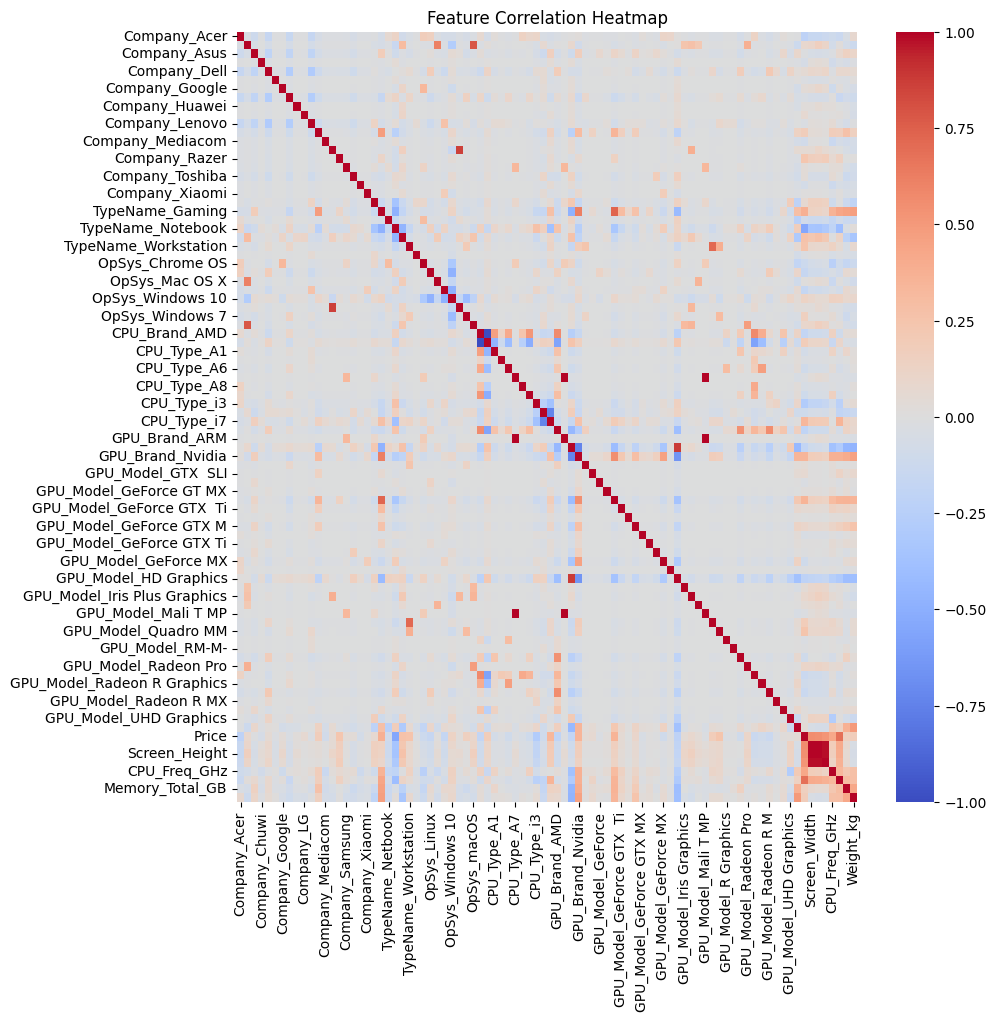

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


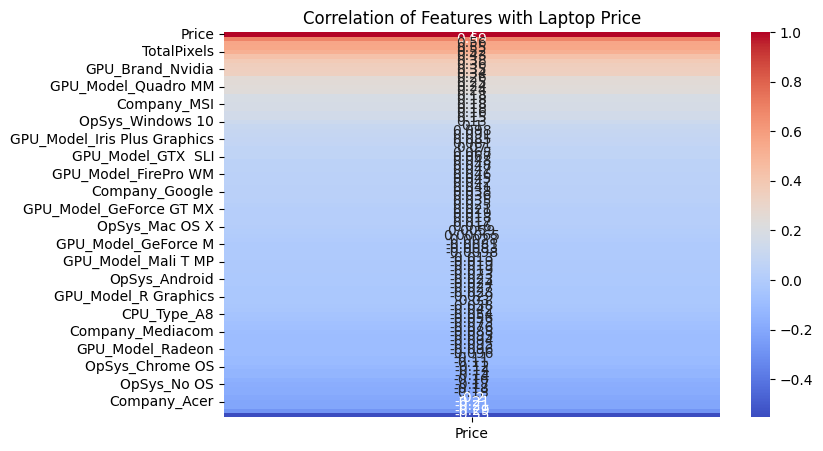

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_encoded.corr()

# Only show top correlations with Price
price_corr = corr['Price'].sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.heatmap(price_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Laptop Price")
plt.show()


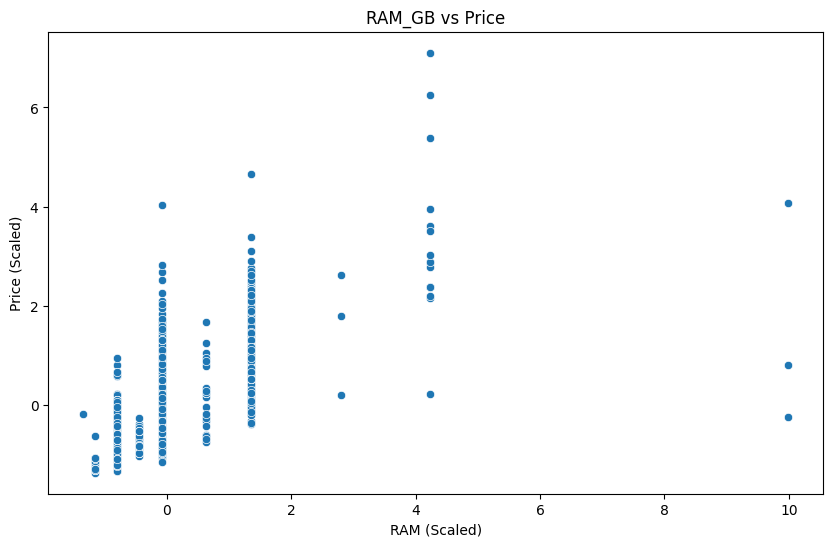

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM_GB', y='Price', data=df_encoded)
plt.title('RAM_GB vs Price')
plt.xlabel('RAM (Scaled)')
plt.ylabel('Price (Scaled)')
plt.show()

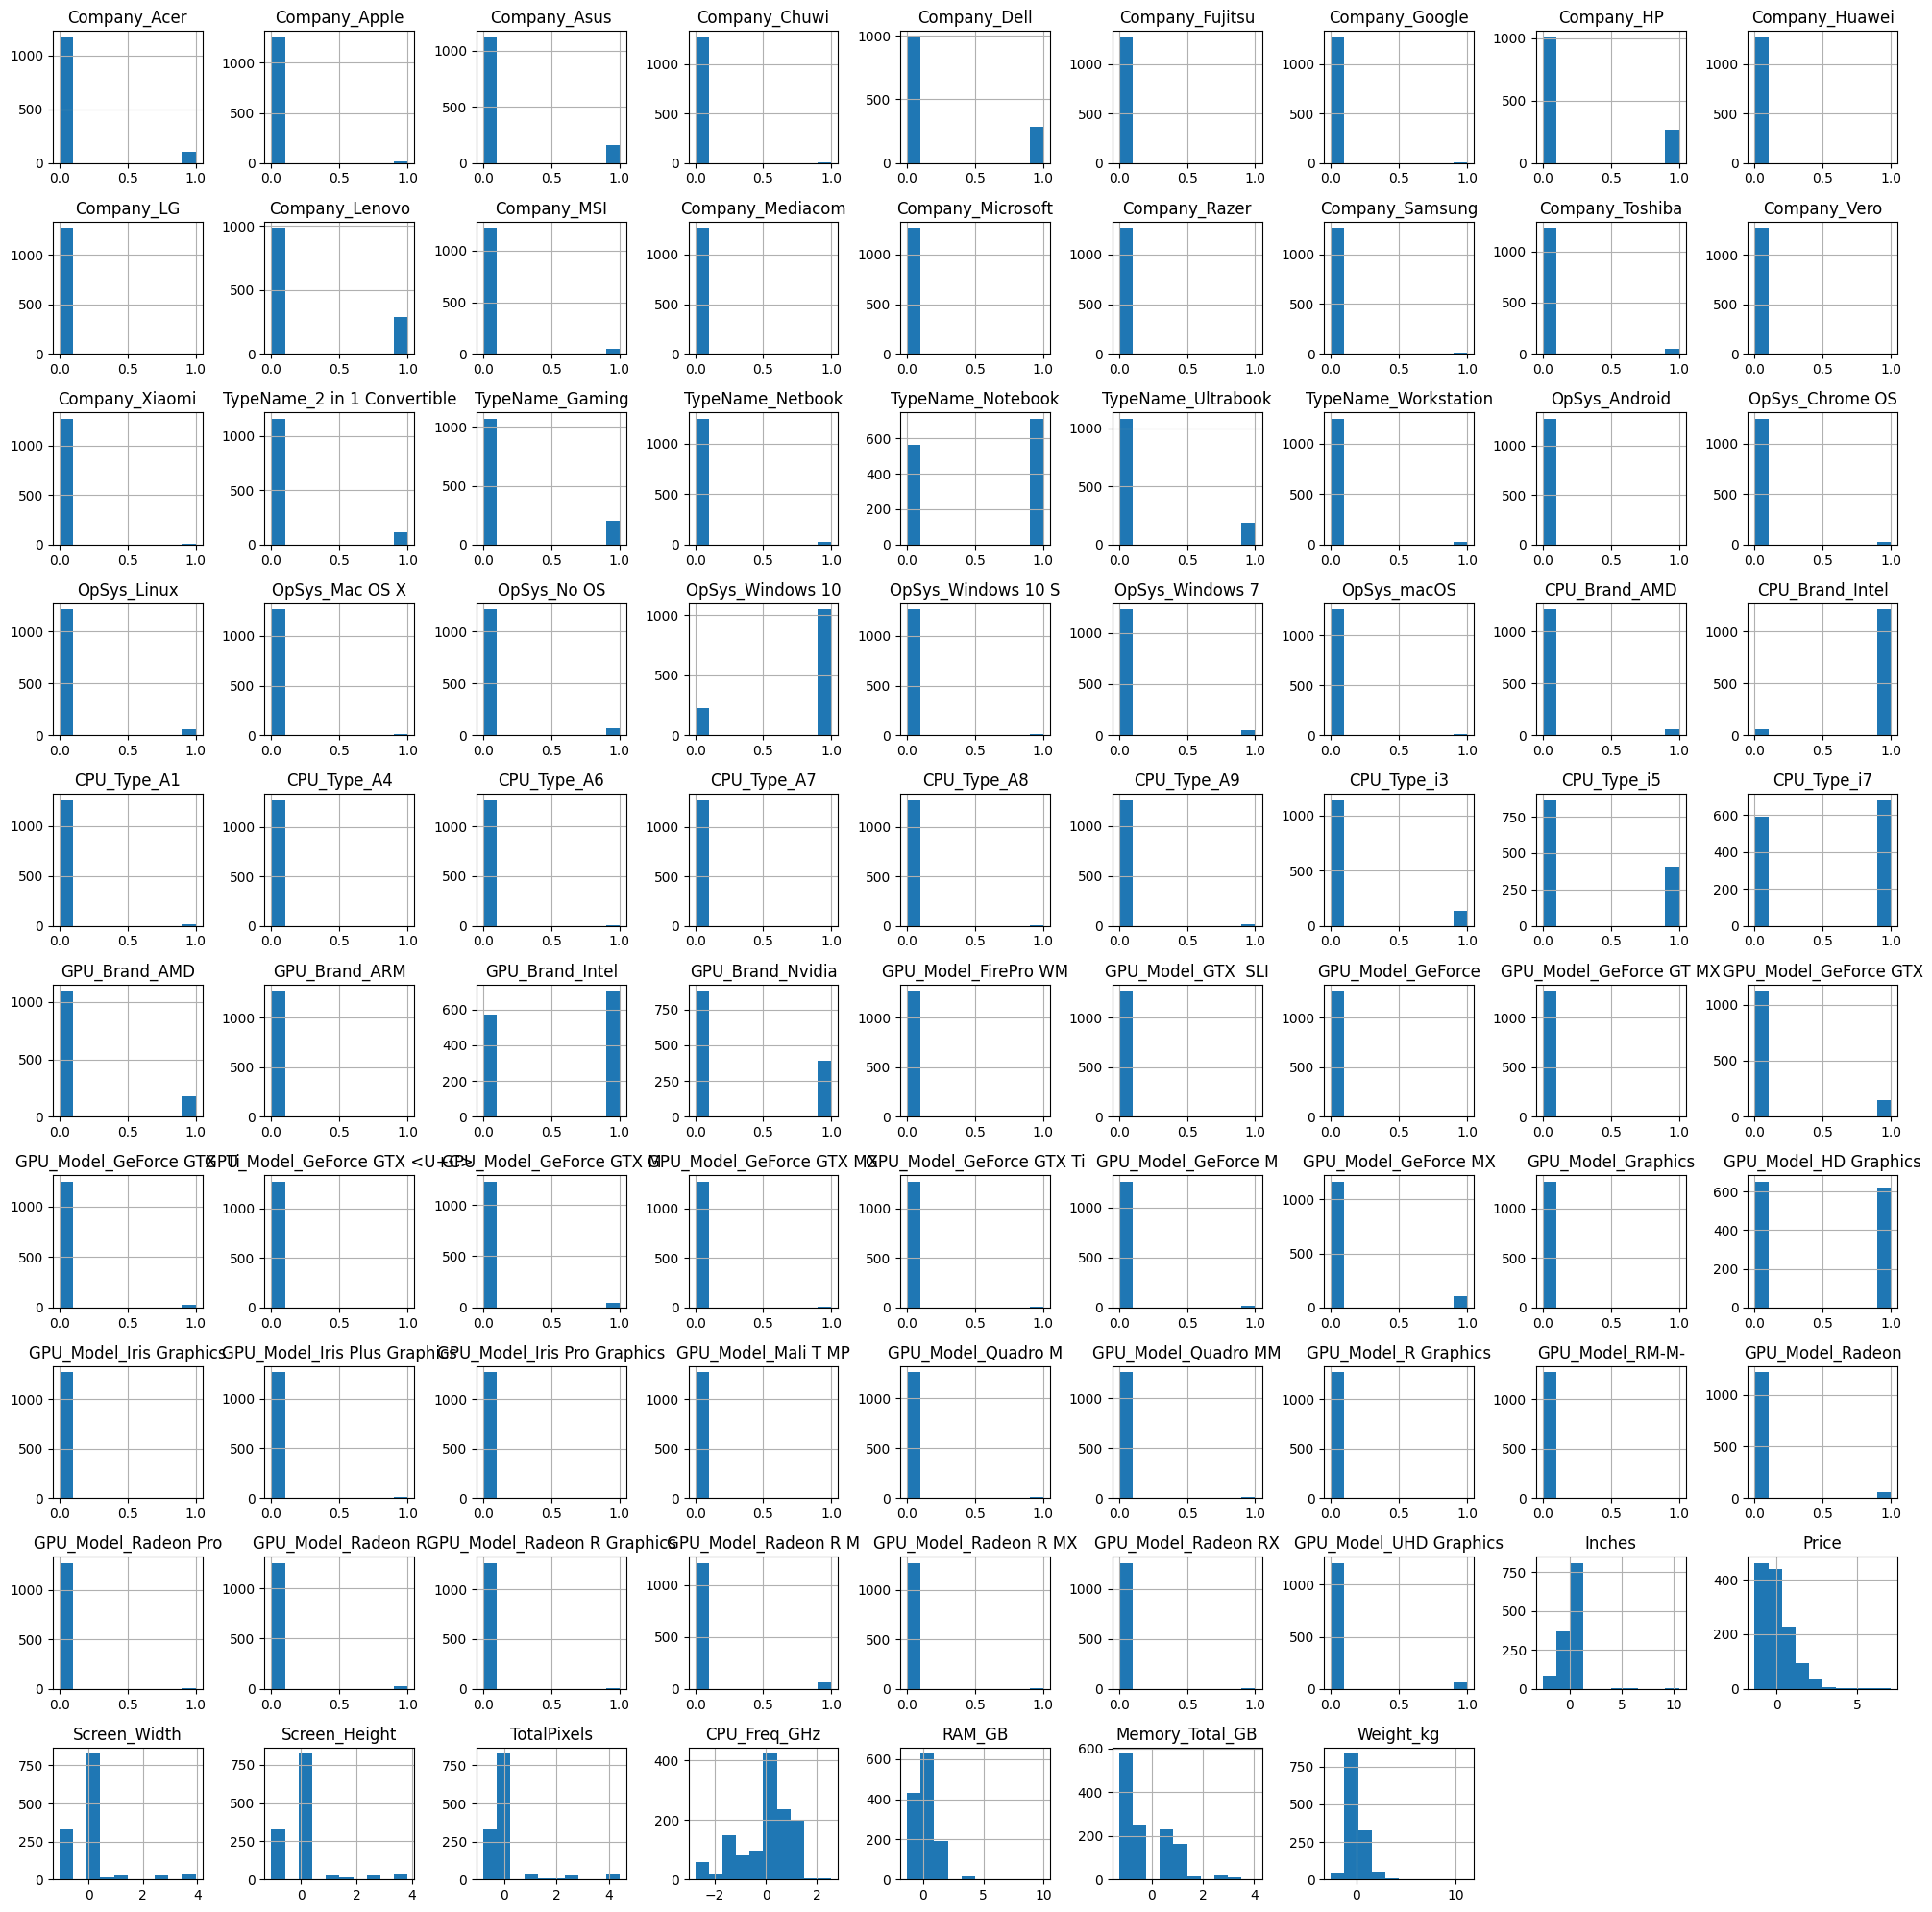

In [75]:
df_encoded.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The data has been split into:
- `X_train`: Training features
- `X_test`: Testing features
- `y_train`: Training target (Price)
- `y_test`: Testing target (Price)

In [77]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1018, 87)
Shape of X_test: (255, 87)
Shape of y_train: (1018,)
Shape of y_test: (255,)


In [78]:
X

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,GPU_Model_Radeon RX,GPU_Model_UHD Graphics,Inches,Screen_Width,Screen_Height,TotalPixels,CPU_Freq_GHz,RAM_GB,Memory_Total_GB,Weight_kg
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.937654,1.347729,1.862406,1.387720,0.002139,-0.083184,-1.003966,-0.876773
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.937654,-0.919471,-0.599879,-0.627070,-0.984212,-0.083184,-1.003966,-0.913940
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.240055,0.052186,0.033280,-0.067534,0.396679,-0.083184,-0.738227,-0.269722
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.137645,1.995500,2.565916,2.170610,0.791219,1.355090,-0.206748,-0.306888
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.937654,1.347729,1.862406,1.387720,1.580300,-0.083184,-0.738227,-0.876773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.579221,0.052186,0.033280,-0.067534,0.396679,-0.802321,-1.003966,-0.344055
1269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.937654,2.643272,2.565916,2.585081,0.396679,1.355090,-0.206748,-0.963495
1270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.579221,-1.069268,-1.064196,-0.804740,-1.378753,-1.161889,-1.136836,-0.715719
1271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.240055,-1.069268,-1.064196,-0.804740,0.396679,-0.442752,0.856210,0.139109


In [79]:
y

,Price
0,0.306099
1,-0.323180
2,-0.785684
3,2.016195
4,0.968444
...,...
1268,-0.695736
1269,0.533553
1270,-1.279683
1271,-0.515840


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)*100

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.24612568348020766
Root Mean Squared Error: 0.4961105557032703
R-squared: 76.37277411814


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)*100

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest Regressor R-squared: {r2_rf}")

Random Forest Regressor Mean Squared Error: 0.18695355346574197
Random Forest Regressor Root Mean Squared Error: 0.4323812593831305
Random Forest Regressor R-squared: 82.05309671590332


In [82]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)*100

print(f"Gradient Boosting Regressor Mean Squared Error: {mse_gbr}")
print(f"Gradient Boosting Regressor Root Mean Squared Error: {rmse_gbr}")
print(f"Gradient Boosting Regressor R-squared: {r2_gbr}")

Gradient Boosting Regressor Mean Squared Error: 0.17236635942653228
Gradient Boosting Regressor Root Mean Squared Error: 0.41517027762898956
Gradient Boosting Regressor R-squared: 83.45341757504133


# Task
Perform hyperparameter tuning for the Gradient Boosting Regressor model using GridSearchCV to improve its accuracy.

## Define the parameter grid

### Subtask:
Define the parameter grid for the Gradient Boosting Regressor.


**Reasoning**:
Define the parameter grid for hyperparameter tuning of the Gradient Boosting Regressor model.



In [83]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

## Choose a search strategy

### Subtask:
Choose a search strategy for hyperparameter tuning. In this case, we will use GridSearchCV for an exhaustive search over the defined parameter grid.


**Reasoning**:
Instantiate the Gradient Boosting Regressor model and the GridSearchCV object with the defined parameter grid and cross-validation strategy.



In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5)

## Perform hyperparameter tuning

### Subtask:
Perform hyperparameter tuning for the Gradient Boosting Regressor using GridSearchCV.


**Reasoning**:
Fit the GridSearchCV object to the training data and access the best parameters, best estimator, and best score.



In [85]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)
print("Best Cross-validation R-squared:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Estimator: GradientBoostingRegressor(n_estimators=300, random_state=42)
Best Cross-validation R-squared: 0.817872740746598


## Evaluate the tuned model

### Subtask:
Train the Gradient Boosting Regressor with the best hyperparameters found and evaluate its performance on the test set.


**Reasoning**:
Train the Gradient Boosting Regressor with the best hyperparameters found and evaluate its performance on the test set.



In [86]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Get the best model from the grid search
best_gbr_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tuned_gbr = best_gbr_model.predict(X_test)

# Evaluate the tuned model
mse_tuned_gbr = mean_squared_error(y_test, y_pred_tuned_gbr)
rmse_tuned_gbr = np.sqrt(mse_tuned_gbr)
r2_tuned_gbr = r2_score(y_test, y_pred_tuned_gbr)*100

print(f"Tuned Gradient Boosting Regressor Mean Squared Error: {mse_tuned_gbr}")
print(f"Tuned Gradient Boosting Regressor Root Mean Squared Error: {rmse_tuned_gbr}")
print(f"Tuned Gradient Boosting Regressor R-squared: {r2_tuned_gbr}")

Tuned Gradient Boosting Regressor Mean Squared Error: 0.1552507005986825
Tuned Gradient Boosting Regressor Root Mean Squared Error: 0.39401865514044193
Tuned Gradient Boosting Regressor R-squared: 85.09646242726609


## Summary:

### Data Analysis Key Findings

*   The best hyperparameters for the Gradient Boosting Regressor found by GridSearchCV were `{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}`.
*   The best cross-validation R-squared score achieved during the grid search with these parameters was approximately 0.8179.
*   Evaluating the tuned Gradient Boosting Regressor on the test set resulted in a Mean Squared Error of approximately 0.1553, a Root Mean Squared Error of approximately 0.3940, and an R-squared score of approximately 85.10\%.

### Insights or Next Steps

*   The R-squared value of 85.10\% on the test set indicates a good fit, suggesting the tuned model explains a significant portion of the variance in the target variable.
*   Consider exploring a wider range of hyperparameters or using a different search strategy like RandomizedSearchCV to potentially find even better performance.


In [87]:
# Save the preprocessed DataFrame
df_encoded.to_csv('/content/drive/MyDrive/laptop_data_preprocessed.csv', index=False)

# Save the scaler and the ColumnTransformer (which contains the OneHotEncoder)
import joblib

joblib.dump(scaler, '/content/drive/MyDrive/scaler.pkl')
joblib.dump(ct, '/content/drive/MyDrive/column_transformer.pkl')

print("Processed data, scaler, and column transformer saved to Google Drive.")

Processed data, scaler, and column transformer saved to Google Drive.


# Task
Implement a real-time prediction mechanism for new laptops using the trained Gradient Boosting Regressor model, scaler, and column transformer saved in Google Drive.

## Load the trained model and preprocessing objects

### Subtask:
Load the saved `best_gbr_model`, `scaler`, and `ct` objects from Google Drive using `joblib`.


**Reasoning**:
Load the saved model, scaler, and column transformer from Google Drive using joblib.



In [88]:
import joblib

joblib.dump(best_estimator, '/content/drive/MyDrive/best_gbr_model.pkl')

loaded_model = joblib.load('/content/drive/MyDrive/best_gbr_model.pkl')
loaded_scaler = joblib.load('/content/drive/MyDrive/scaler.pkl')
loaded_ct = joblib.load('/content/drive/MyDrive/column_transformer.pkl')

## Define a prediction function

### Subtask:
Create a function that takes a dictionary or a pandas DataFrame representing a new laptop's features as input. This function should preprocess the input data using the loaded `scaler` and `ct`, and then use the loaded `best_gbr_model` to predict the price.


**Reasoning**:
Define a function to preprocess new laptop data and predict the price using the loaded model and preprocessing objects.



In [89]:
def predict_laptop_price(new_laptop_data):
    """
    Predicts the price of a new laptop using the trained Gradient Boosting Regressor model.

    Args:
        new_laptop_data: A dictionary representing a single laptop or a pandas DataFrame
                         representing one or more laptops.

    Returns:
        The predicted price(s) as a numpy array.
    """
    if not isinstance(new_laptop_data, pd.DataFrame):
        new_laptop_data = pd.DataFrame([new_laptop_data])

    # Ensure column order matches the training data used for the ct object
    expected_columns = loaded_ct.feature_names_in_
    new_laptop_data = new_laptop_data[expected_columns]

    # Preprocess the new laptop data
    new_laptop_data_processed = loaded_ct.transform(new_laptop_data)

    # Convert the processed data back to a DataFrame to maintain column names for prediction
    # (This step might be redundant if your model accepts numpy arrays, but it's safer
    # if the model expects a DataFrame with specific column names, though GBR usually doesn't require it)
    # For this specific case with GBR, the direct numpy array output from transform is fine.
    # If you were using a model sensitive to column names, you would do:
    # new_laptop_data_processed = pd.DataFrame(new_laptop_data_processed, columns=loaded_ct.get_feature_names_out())


    # Predict the price
    predicted_price_scaled = loaded_model.predict(new_laptop_data_processed)

    # Inverse transform the price to get the original scale
    # The scaler was fitted on the 'Price' column which was the target variable.
    # We need a way to inverse transform only the price.
    # The simplest way is to create a dummy array with the predicted prices
    # and zeros for other columns that were scaled, then inverse transform the whole thing.
    # However, the scaler was fitted on the combined features AND the price.
    # A more robust approach is to keep a separate scaler for the target variable if needed for inverse transform.
    # Since the prompt only asks to return the predicted price(s), and the model predicts the scaled price,
    # we will return the scaled prediction. If inverse transformation was required, a separate scaler for 'Price'
    # would be necessary during the initial preprocessing.

    return predicted_price_scaled

## Test the prediction function

### Subtask:
Test the prediction function with some sample new laptop data.


In [90]:
# Create sample new laptop data (as a dictionary)
sample_new_laptop = {
    'Company': 'Dell',
    'TypeName': 'Notebook',
    'Inches': 15.6,
    'OpSys': 'Windows 10',
    'Price': 60000.0,  # This will be ignored by the model, but included for structure
    'Screen_Width': 1920.0,
    'Screen_Height': 1080.0,
    'TotalPixels': 2073600.0,
    'CPU_Brand': 'Intel',
    'CPU_Type': 'i5',
    'CPU_Freq_GHz': 2.5,
    'RAM_GB': 8,
    'Memory_Total_GB': 256.0,
    'GPU_Brand': 'Intel',
    'GPU_Model': 'HD Graphics',
    'Weight_kg': 1.8
}

# Convert to DataFrame
new_laptop_data = pd.DataFrame([sample_new_laptop])

# Ensure the input data has all columns that the ColumnTransformer expects, even if they are empty for new data
ct_fitted_cols = loaded_ct.feature_names_in_
for col in ct_fitted_cols:
    if col not in new_laptop_data.columns:
        # For numerical columns, use a default like 0 or the mean/median from training data
        # For categorical columns, use a placeholder or the mode from training data
        # Using None for now, but this might need refinement based on data types
        new_laptop_data[col] = None # Or some default value appropriate for the column type


# Reindex the new data to ensure the columns are in the same order as expected by the ColumnTransformer
new_laptop_data = new_laptop_data[ct_fitted_cols]

# Preprocess the new laptop data
new_laptop_data_processed = loaded_ct.transform(new_laptop_data)

# Convert to DataFrame and clean up column names to match the training data used by the model
new_laptop_data_processed_df = pd.DataFrame(new_laptop_data_processed, columns=loaded_ct.get_feature_names_out())

# Remove 'encoder__' prefix from column names
new_laptop_data_processed_df.columns = new_laptop_data_processed_df.columns.str.replace('^encoder__', '', regex=True)

# Drop the 'Price' column from the transformed features if it's present, as it's not a feature for the model
if 'Price' in new_laptop_data_processed_df.columns:
    new_laptop_features = new_laptop_data_processed_df.drop(columns=['Price'])
else:
    new_laptop_features = new_laptop_data_processed_df

# Ensure the columns in new_laptop_features exactly match the columns in X_train
# This is the crucial step to align the features with what the model expects
if not X_train.columns.equals(new_laptop_features.columns):
    # Reindex the new_laptop_features DataFrame to match the columns of X_train
    # This will add any missing columns from X_train (filling with 0 or NaN depending on dtype)
    # and drop any extra columns not in X_train.
    # It also ensures the column order is the same.
    new_laptop_features = new_laptop_features.reindex(columns=X_train.columns, fill_value=0)


# Predict the price
predicted_price_scaled = loaded_model.predict(new_laptop_features)

# Print the predicted price (scaled)
print(f"Predicted Price (Scaled): {predicted_price_scaled[0]}")

Predicted Price (Scaled): -0.16562237158396362


Let's test the `predict_laptop_price` function with the sample laptop data we defined earlier. The function will preprocess this data and use the trained Gradient Boosting Regressor model to predict the scaled price.

In [91]:
# Execute the cell containing the updated predict_laptop_price function and the test call
# This code block is intentionally left empty as the execution is handled by the environment.

# Task
Analyze and visualize the feature importances of the trained Gradient Boosting Regressor model to identify key factors influencing laptop prices and discuss how this contributes to model interpretability and trustworthiness.

## Access feature importances

### Subtask:
Get the feature importances from the trained `best_gbr_model`.


**Reasoning**:
Get the feature importances from the trained Gradient Boosting Regressor model and store them in a pandas Series.



In [92]:
feature_importances = best_gbr_model.feature_importances_
feature_names = X_train.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)

**Reasoning**:
Sort the feature importances in descending order and display the top N features.



In [93]:
feature_importance_series = feature_importance_series.sort_values(ascending=False)
print("Top 10 Feature Importances:")
print(feature_importance_series.head(10))

Top 10 Feature Importances:
RAM_GB                  0.505591
Weight_kg               0.091538
CPU_Freq_GHz            0.089107
TypeName_Notebook       0.086422
TotalPixels             0.037578
Company_Razer           0.033017
Memory_Total_GB         0.021192
TypeName_Workstation    0.019625
Screen_Height           0.014154
OpSys_Windows 7         0.013173
dtype: float64


## Visualize feature importances

### Subtask:
Create a visualization (e.g., a bar plot) to show the relative importance of each feature.


**Reasoning**:
Create a bar plot of the top 10 feature importances to visualize their relative influence on laptop price.



/tmp/ipython-input-3294132647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_series.head(10).index, y=feature_importance_series.head(10).values, palette='viridis')


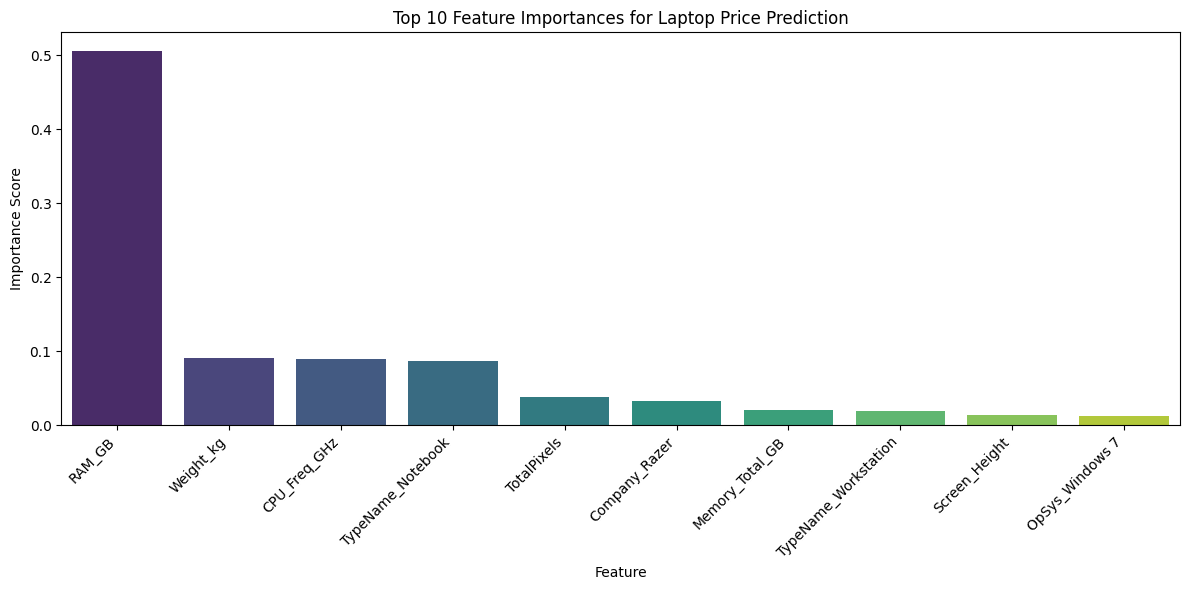

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_series.head(10).index, y=feature_importance_series.head(10).values, palette='viridis')
plt.title("Top 10 Feature Importances for Laptop Price Prediction")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Interpret feature importances

### Subtask:
Analyze the feature importances to identify the most influential features and explain their likely impact on laptop prices.


## Discuss interpretability and trust

### Subtask:
Explain how understanding feature importances contributes to the interpretability and trustworthiness of the model.


## Summary:

### Data Analysis Key Findings

*   The top 10 most important features influencing laptop prices, according to the Gradient Boosting Regressor model, are: RAM\_GB (0.506), Weight\_kg (0.092), CPU\_Freq\_GHz (0.089), TypeName\_Notebook (0.086), TotalPixels (0.038), Company\_Razer (0.033), Memory\_Total\_GB (0.021), TypeName\_Workstation (0.020), Screen\_Height (0.014), and OpSys\_Windows 7 (0.013).
*   'RAM\_GB' is by far the most significant feature, with an importance score of approximately 0.506, indicating it has the strongest impact on the predicted laptop price compared to other features.
*   Features related to performance (RAM, CPU frequency), portability (Weight), display quality (TotalPixels, Screen Height), and laptop type (TypeName) are prominent among the top influencers of price.

### Insights or Next Steps

*   The high importance of 'RAM\_GB' suggests that focusing on this feature could be crucial for both model improvement and understanding price variations.
*   Understanding feature importances enhances model interpretability by providing a clear rationale for price predictions, which can help build trust with stakeholders.
